In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [90]:
df = pd.read_csv(r"D:\AI\008_NED_Machine_Learning\data\013-HR_comma_sep(Logistic Regression Model).csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [91]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [93]:
pd.DataFrame(df.value_counts()) 

count
satisfaction_level last_evaluation number_project average_montly_hours time_spend_company Work_accident left promotion_last_5years Department salary       
0.46               0.57            2              139                  3                  0             1    0                     sales      low         6
0.37               0.46            2              156                  3                  0             1    0                     sales      low         4
0.10               0.85            6              266                  4                  0             1    0                     sales      low         4
0.41               0.46            2              128                  3                  0             1    0                     accounting low         4
0.42               0.53            2              142                  3                  0             1    0                     sales      low         4
...                                                                                                                                                     ...
0.58               0.79            4              196                  3                  1             0    0                     hr         low         1
                                   5              197                  3                  0             0    0                     RandD      medium      1
                                                  262                  2                  0             0    0                     sales      high        1
                   0.80            3              181                  4                  0             0    0                     technical  high        1
1.00               1.00            5              142                  4                  0             0    0                     sales      low         1

[11991 rows x 1 columns]

In [94]:
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [95]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [96]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [97]:
salary_retention = df.groupby('salary')['left'].mean()
print (salary_retention * 100)

salary
high       6.628941
low       29.688354
medium    20.431275
Name: left, dtype: float64


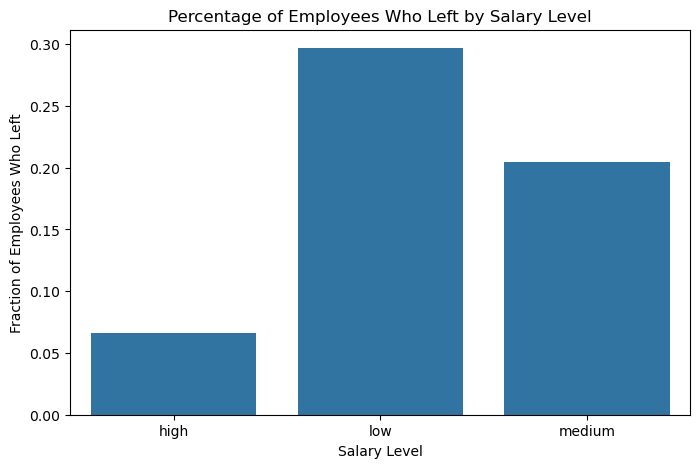

In [98]:
plt.figure(figsize=(8, 5))
sns.barplot(x=salary_retention.index, y=salary_retention.values)
plt.title('Percentage of Employees Who Left by Salary Level')
plt.ylabel('Fraction of Employees Who Left')
plt.xlabel('Salary Level')
plt.show()

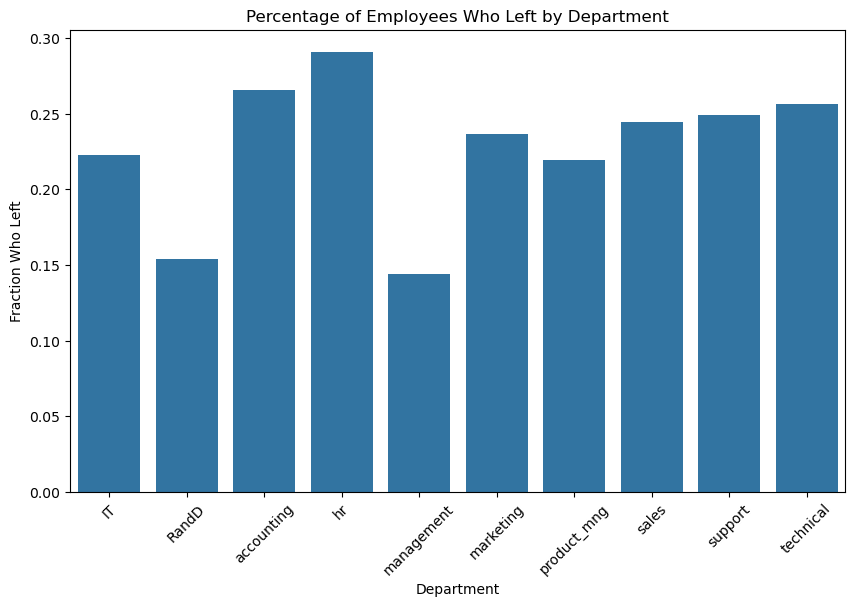

In [99]:
department_retention = df.groupby('Department')['left'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=department_retention.index, y=department_retention.values)
plt.title('Percentage of Employees Who Left by Department')
plt.ylabel('Fraction Who Left')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()

In [100]:
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})

In [101]:
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

In [102]:
X = df.drop('left', axis=1) 
y = df['left'] 

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [105]:
X_test = scaler.transform(X_test)


In [106]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [107]:
y_pred = model.predict(X_test)
y_pred


array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [108]:
pd.DataFrame({'y_test':y_test,'y_predict':y_pred})


,y_test,y_predict
3059,0,1
386,1,1
12830,0,0
4212,0,1
14609,1,0
...,...,...
2217,0,0
13877,0,0
1554,1,0
11941,0,1


In [109]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [110]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy Score: 0.795
Precision Score: 0.6047058823529412
Recall Score: 0.3650568181818182
F1 Score: 0.4552701505757307
